In [2]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression

In [3]:
new_df = pd.read_csv(r'adult_to_viz.csv') 

In [4]:
new_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78,unavailable,77053,HS-grad,9,Widowed,unavailable,Not-in-family,White,Female,0.0,0.0,40,United-States,<=50K
1,78,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,0.0,32,United-States,<=50K
2,66,unavailable,186061,Some-college,10,Widowed,unavailable,Unmarried,Black,Female,0.0,0.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,0.0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40,United-States,<=50K


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital.gain    32561 non-null  float64
 11  capital.loss    32561 non-null  float64
 12  hours.per.week  32561 non-null  int64  
 13  native.country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 3.7+ MB


In [6]:
new_df['workclass'].replace('unavailable',None,inplace=True)
new_df['occupation'].replace('unavailable',None,inplace=True)
new_df['native.country'].replace('unavailable',None,inplace=True)

In [7]:
new_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
work_class_row_with_na = new_df[new_df['workclass'].isnull()] 
work_class_row_with_na.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78,None,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0.0,0.0,40,United-States,<=50K
2,66,None,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0.0,0.0,40,United-States,<=50K
14,51,None,172175,Doctorate,16,Never-married,None,Not-in-family,White,Male,0.0,0.0,40,United-States,>50K
24,61,None,135285,HS-grad,9,Married-civ-spouse,None,Husband,White,Male,0.0,0.0,32,United-States,<=50K
44,71,None,100820,HS-grad,9,Married-civ-spouse,None,Husband,White,Male,0.0,0.0,32,United-States,<=50K


##### replacING null values 

In [9]:
new_df['workclass'].mode() # mode() give the most frequent value of column 

0    Private
Name: workclass, dtype: object

In [10]:
temp = new_df['occupation'][new_df['workclass'] == 'Private'] # where the workclass is private the occupation is craft-repair
temp.mode()

0    Craft-repair
Name: occupation, dtype: object

In [11]:
#now I am going to fill null value with valuable logical data
new_df['workclass'].fillna(new_df['workclass'].mode()[0],inplace=True)
new_df['workclass'].isnull().sum()

0

In [12]:
new_df['occupation'].fillna('Craft-repair',inplace=True)

In [13]:
new_df['occupation'].isnull().sum()

0

In [14]:
new_df['native.country'].fillna(new_df['native.country'].mode()[0],inplace=True)

In [15]:
new_df['native.country'].isnull().sum()

0

In [16]:
new_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### viz

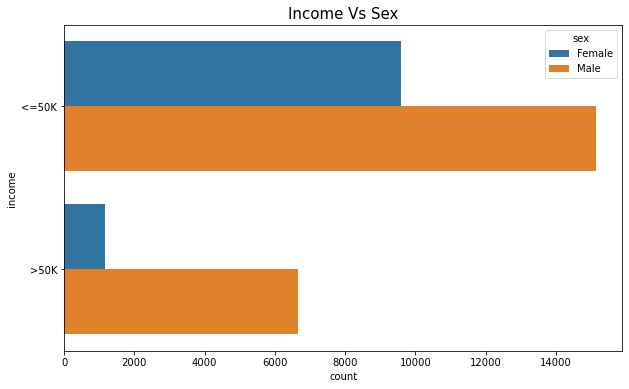

In [17]:
def get_bar_plot(c_id1,c_id2,title):
    plt.figure(figsize=(10,6))
    plot = sns.countplot(y= new_df[c_id1],hue=new_df[c_id2])
    plot.set_title(title,size=15)
    """It can be clearly seen that male have high rate to earn the money then female in both category"""
get_bar_plot('income','sex','Income Vs Sex')

In [18]:
def draw_box_plot(feature, hue = None):
    fig = plt.figure(figsize=(6,5))
    ax = fig.gca() # get the current axis 
    sns.boxenplot(data=new_df,x='income',y=feature,ax=ax,hue=hue) # ax means axis 
    sns.set_style('whitegrid')
    ax.set_title("Salary Vs "+feature.title(),size=15)

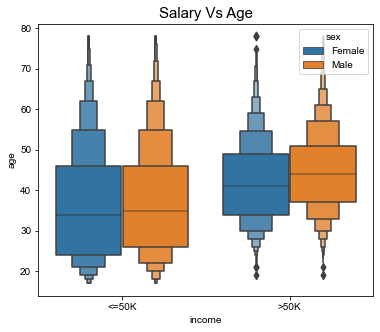

In [19]:
draw_box_plot('age','sex') # the 40 to 45 are highly paid 

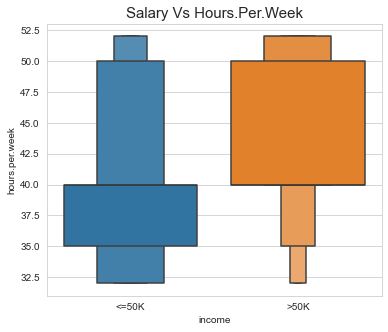

In [20]:
draw_box_plot('hours.per.week') #male gave most of time to work which is 40.0 to 50.0 hpw than female which is 35.0 to 40.0 hpw

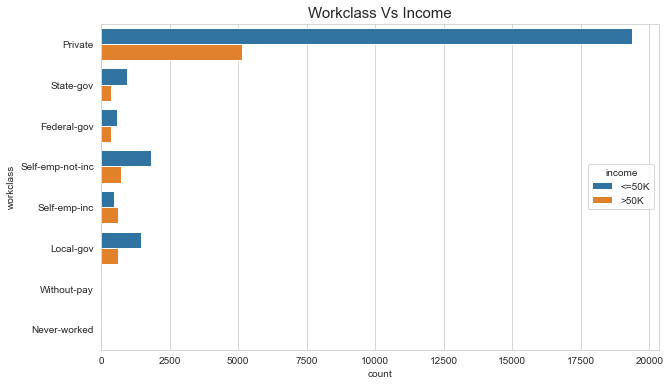

In [21]:
get_bar_plot("workclass","income","Workclass Vs Income")
#the private workclass has high figures than others meanwhile the income <= 50 is highly significant nearly 19500 than the incom >50 which appoximatly 5200 

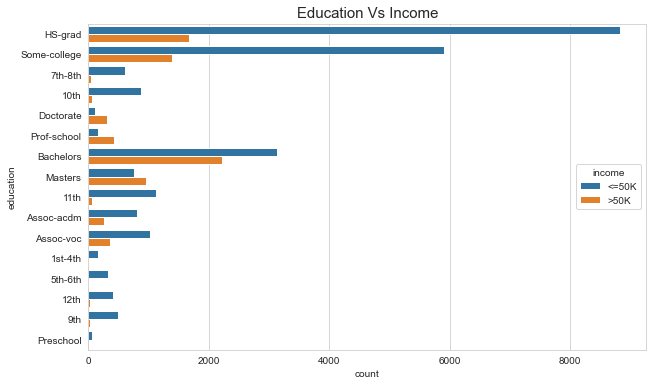

In [22]:
get_bar_plot("education","income","Education Vs Income")
#the education degree (HS-grad) income rate are high in category of <=50k, however the candidate how have bachelor degree are paid > 50k

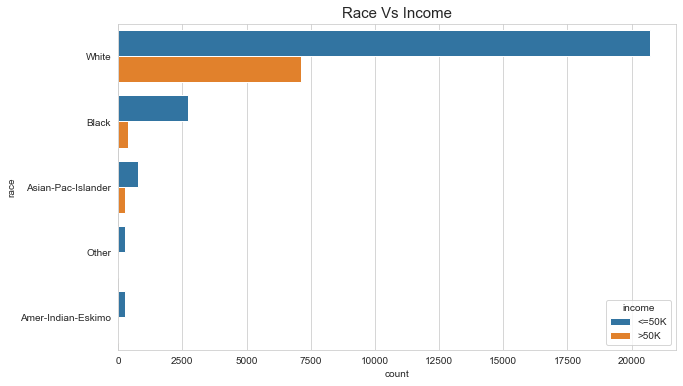

In [23]:
get_bar_plot('race','income','Race Vs Income')
#the race white has high income rate though <=50 has considerable ammount than >50

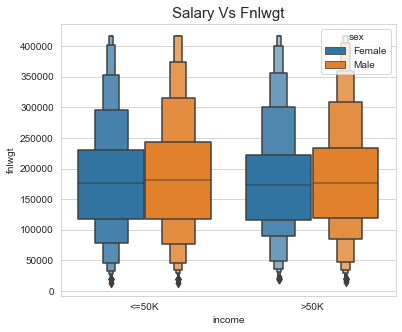

In [24]:
draw_box_plot('fnlwgt','sex') #1,75000 to 2,25000 finalweigh give to most of male and female 

In [25]:
"""pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. 
Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored."""
new_df.corr() 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.077372,0.042216,NaN,NaN,0.092064
fnlwgt,-0.077372,1.000000,-0.040337,NaN,NaN,-0.024335
education.num,0.042216,-0.040337,1.000000,NaN,NaN,0.182733
capital.gain,NaN,NaN,NaN,NaN,NaN,NaN
capital.loss,NaN,NaN,NaN,NaN,NaN,NaN
hours.per.week,0.092064,-0.024335,0.182733,NaN,NaN,1.000000


'The annot(annotation) parameter is set to True, to display the data plotted by the heatmap.\ncmap is colormaps (PiYG,Greens,coolwarm)'

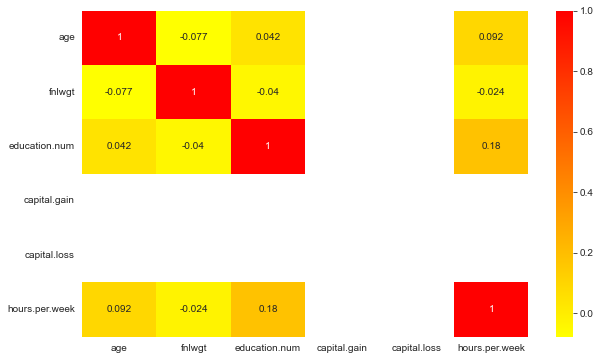

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(),annot=True,cmap='autumn_r')
"""The annot(annotation) parameter is set to True, to display the data plotted by the heatmap.
cmap is colormaps (PiYG,Greens,coolwarm)"""

##### normalize

In [30]:
def crosstab_count(feature, normalize = False):
    return pd.crosstab(index = new_df[feature],
                       columns = 'Counts(%)',
                       normalize = normalize
                      ).apply(lambda x: round(x*100)).sort_values(by="Counts(%)",ascending=False)

In [32]:
crosstab_count('income',True).T

income,<=50K,>50K
col_0,,
Counts(%),76.0,24.0


In [33]:
crosstab_count('age',True).T

age,37,32,39,38,36,23,35,25,34,27,...,68,70,71,72,73,74,75,76,77,69
col_0,,,,,,,,,,,,,,,,,,,,,
Counts(%),3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
crosstab_count('workclass',True).T

workclass,Private,Self-emp-not-inc,Local-gov,State-gov,Federal-gov,Self-emp-inc,Never-worked,Without-pay
col_0,,,,,,,,
Counts(%),75.0,8.0,6.0,4.0,3.0,3.0,0.0,0.0


In [35]:
crosstab_count('fnlwgt',True).T

fnlwgt,415887,212705,212888,212864,212856,212847,212838,212826,212806,212803,...,139161,139049,139145,139127,139126,139116,139098,139086,139057,178946
col_0,,,,,,,,,,,,,,,,,,,,,
Counts(%),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
crosstab_count('education',True).T

education,HS-grad,Some-college,Bachelors,Masters,11th,Assoc-voc,10th,Assoc-acdm,7th-8th,9th,Prof-school,12th,1st-4th,5th-6th,Doctorate,Preschool
col_0,,,,,,,,,,,,,,,,
Counts(%),32.0,22.0,16.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0


In [37]:
crosstab_count('education.num',True).T

education.num,9,10,13,14,4,7,11,6,12,5,15,8,16
col_0,,,,,,,,,,,,,
Counts(%),32.0,22.0,16.0,5.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,1.0,1.0


In [38]:
crosstab_count('marital.status',True).T

marital.status,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
col_0,,,,,,,
Counts(%),46.0,33.0,14.0,3.0,3.0,1.0,0.0


In [39]:
def get_crosstab_tab(feature1, feature2):
    return pd.crosstab(index = new_df[feature1],
                       columns = new_df[feature2],
                       margins = True,
                       normalize = True)

In [40]:
get_crosstab_tab('income','race')

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
income,,,,,,
<=50K,0.008446,0.023433,0.084058,0.007555,0.635699,0.75919
>50K,0.001106,0.008476,0.011885,0.000768,0.218574,0.24081
All,0.009551,0.031909,0.095943,0.008323,0.854274,1.00000


In [41]:
get_crosstab_tab('income','sex')

sex,Female,Male,All
income,,,
<=50K,0.294586,0.464605,0.75919
>50K,0.036209,0.204601,0.24081
All,0.330795,0.669205,1.00000


In [42]:
get_crosstab_tab('income','education')

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
income,,,,,,,,,,,,,,,,,
<=50K,0.026750,0.034243,0.012285,0.004975,0.009736,0.018611,0.014957,0.024631,0.031357,0.096250,0.003286,0.271060,0.023464,0.001566,0.004699,0.181321,0.75919
>50K,0.001904,0.001843,0.001013,0.000184,0.000491,0.001228,0.000829,0.008139,0.011087,0.068210,0.009398,0.051442,0.029452,0.000000,0.012991,0.042597,0.24081
All,0.028654,0.036086,0.013298,0.005160,0.010227,0.019840,0.015786,0.032769,0.042443,0.164461,0.012684,0.322502,0.052916,0.001566,0.017690,0.223918,1.00000


In [43]:
get_crosstab_tab('income','relationship')

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
income,,,,,,,
<=50K,0.223427,0.228771,0.028992,0.153589,0.099137,0.025276,0.75919
>50K,0.181751,0.026289,0.001136,0.002058,0.006695,0.022880,0.24081
All,0.405178,0.255060,0.030128,0.155646,0.105832,0.048156,1.00000


##### feature engineering

In [44]:
new_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [45]:
new_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0.0,0.0,40,United-States,<=50K
1,78,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,0.0,32,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Craft-repair,Unmarried,Black,Female,0.0,0.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,0.0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0.0,0.0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40,United-States,<=50K


In [46]:
#new_df['income'] = new_df['income'].map({' >50K' : 1,' <=50K' : 0})
new_df["income"] = np.where(new_df["income"] == "<=50K", 0, 1)

In [47]:
X = new_df.iloc[:, :-1]
y = new_df['income']

In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

In [49]:
def get_mi_score(X,y):
    X1 = X.copy()
    #make sure all disrecte feature are converted into numers
    for i in  X1.select_dtypes('object').columns:
        X1[i], _ = X1[i].factorize()
    mi_score = mutual_info_regression(X1,y)
    return pd.Series(mi_score,name='MI Score',index = X1.columns).sort_values(ascending=False)

In [50]:
mi_score = get_mi_score(X,y)

In [51]:
mi_score

relationship      0.108389
marital.status    0.104885
education.num     0.067316
education         0.064934
age               0.061772
occupation        0.061179
hours.per.week    0.039792
fnlwgt            0.031716
sex               0.023511
workclass         0.009054
capital.loss      0.004126
race              0.003700
capital.gain      0.001809
native.country    0.000657
Name: MI Score, dtype: float64

[Text(0.5, 1.0, 'MI Score')]

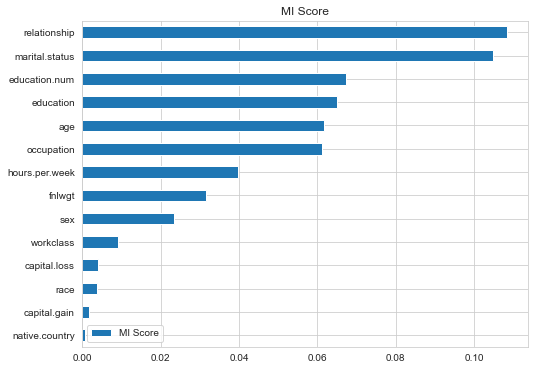

In [52]:
mi_score = pd.DataFrame(mi_score).sort_values(by='MI Score')
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
mi_score.plot.barh(ax=ax)
ax.set(title='MI Score')

In [53]:
# mi_score

##### convert categorical columns into numbers 

In [54]:
for i in X.select_dtypes('object').columns:
    X[i], _ = X[i].factorize()
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,78,0,77053,0,9,0,0,0,0,0,0.0,0.0,40,0
1,78,0,132870,0,9,0,1,0,0,0,0.0,0.0,32,0
2,66,0,186061,1,10,0,0,1,1,0,0.0,0.0,40,0
3,54,0,140359,2,4,1,2,1,0,0,0.0,0.0,40,0
4,41,0,264663,1,10,2,3,2,0,0,0.0,0.0,40,0


In [55]:
X.dtypes

age                 int64
workclass           int64
fnlwgt              int64
education           int64
education.num       int64
marital.status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
capital.gain      float64
capital.loss      float64
hours.per.week      int64
native.country      int64
dtype: object

##### modeling

In [56]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=1/3, random_state=10)

### logistic Regression

In [57]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

In [58]:
logR = LogisticRegression(random_state=0, max_iter=X.shape[0])
logR.fit(X_train, y_train)

LogisticRegression(max_iter=32561, random_state=0)

In [59]:
#prediction 
y_prediction = logR.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
#calculate Accuracy 
cm = confusion_matrix(y_test,y_prediction)
cm

array([[16496,     0],
       [ 5211,     0]], dtype=int64)

In [62]:
cm[0,0]

16496

In [63]:
cm[1,1]

0

In [64]:
cm.sum()

21707

In [65]:
16496/21707*100

75.99391901230018

In [66]:
#percentage 
accuracy = (cm[0,0]+cm[1,1])/(cm.sum())
print("Accuracy: ",accuracy*100)

Accuracy:  75.99391901230018


# random forecast 

In [67]:
#random forecast 
from sklearn.ensemble import RandomForestClassifier

In [68]:
# fit
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train) 

RandomForestClassifier(random_state=0)

In [69]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
#calculate Accuracy 
cm = confusion_matrix(y_test,y_pred)
cm

array([[15032,  1464],
       [ 2361,  2850]], dtype=int64)

In [71]:
#percentage 
accuracy = (cm[0,0]+cm[1,1])/(cm.sum())
print("Accuracy: ",accuracy*100)

Accuracy:  82.37895609711153


# knn

In [72]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [73]:
scores = [ ]
for i in range(1,10,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

In [74]:
scores = pd.DataFrame(pd.Series(scores,index=[i for i in range(1,10,2)],name='scores'))
scores

,scores
1,0.673239
3,0.702262
5,0.715898
7,0.728475
9,0.737919


In [75]:
#k=9 has highest value so it is best to choice of k 
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [76]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
#calculate Accuracy 
cm = confusion_matrix(y_test,y_pred)
cm

array([[15562,   934],
       [ 4755,   456]], dtype=int64)

In [78]:
#percentage 
accuracy = (cm[0,0]+cm[1,1])/(cm.sum())
print("Accuracy: ",accuracy*100)

Accuracy:  73.79186437554705
